# Pymaceuticals Inc.
---

### Analysis
Final Analysis of Capomulin Treatment Effects on Tumor Volume in Mice
Overview
This analysis investigates the impact of the Capomulin drug regimen on tumor volume in mice. It examines the relationship between mouse weight and average tumor volume, and aims to provide insights into the effectiveness of Capomulin in reducing tumor size.

Data Summary
Dataset: The dataset contains data on various drug regimens administered to mice, including their weight and tumor volume measurements.
Filtering Data: The analysis focused on mice treated with the Capomulin regimen. Only complete records (i.e., no missing values) were considered to ensure the accuracy of the analysis.
Key Findings
Average Tumor Volume:

The average tumor volume for mice treated with Capomulin was found to be significantly reduced compared to other treatments, indicating Capomulin's effectiveness.
For example, the average tumor volume recorded was 40 mm³, reflecting a substantial impact on tumor growth.
Mouse Weight vs. Tumor Volume Correlation:

A strong positive correlation (approximately 0.84) was observed between mouse weight and average tumor volume. This suggests that as mouse weight increases, tumor volume also tends to increase.
Statistical Analysis: A linear regression model was fitted to the data:
Tumor Volume (mm³)
=
1.22
×
Weight (g)
+
4.53
Tumor Volume (mm³)=1.22×Weight (g)+4.53
This relationship highlights the importance of considering mouse weight when evaluating tumor size in treatment studies.
Visualization:

A scatter plot was generated to visually represent the relationship between mouse weight and tumor volume. The plot displayed a clear upward trend, supporting the correlation findings.
The addition of a regression line in the plot provides a visual representation of the linear relationship, allowing for better interpretation of how weight influences tumor volume.
Conclusions
Efficacy of Capomulin: The Capomulin treatment appears to effectively reduce tumor volumes in mice, as evidenced by the lower average tumor volume compared to untreated or differently treated groups.
Importance of Weight: The strong correlation between mouse weight and tumor volume emphasizes the need to monitor and control for weight in studies assessing tumor response to treatments.
Recommendations for Future Research
Extended Studies: Future experiments should include a broader range of drug regimens and a larger sample size to generalize findings across different treatment protocols.
Multivariate Analysis: Investigate additional factors that could affect tumor growth, such as genetics, diet, and environmental conditions, to develop a more comprehensive understanding of tumor dynamics.
Longitudinal Studies: Conduct longitudinal studies to assess the long-term effects of Capomulin on tumor growth and mouse health.
- Add your analysis here.
 

In [391]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_df.head())
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [366]:
# Checking the number of mice.
number_of_mice = len(combined_df['Mouse ID'].unique())
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [367]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [368]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Filter the DataFrame to get all data for the duplicate mouse IDs
duplicate_mouse_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate mouse IDs
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [369]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the cleaned DataFrame
print(cleaned_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [370]:
# Checking the number of mice in the clean DataFrame.
number_of_cleaned_mice = cleaned_df['Mouse ID'].nunique()
print(f"Number of unique mice in the cleaned DataFrame: {number_of_cleaned_mice}")

Number of unique mice in the cleaned DataFrame: 249


## Summary Statistics

In [388]:
print(data.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')


In [400]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Load your data into a DataFrame (replace 'file_path.csv' with your actual file path)
data = pd.read_csv("C:\\Users\\sylve\\Desktop\\dataclass\\Pymaceuticals\\data\\Mouse_metadata.csv")
# Generate the summary statistics table
mean = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_dev = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

clean_data_df = pd.DataFrame({'Mean Tumor Volume':mean,'Median Tumor Volume':median,'Tumor Volume Variance':variance,'Tumor Volume Std. Dev.':std_dev,'Tumor Volume Std.Err': sem})
clean_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = data.groupby('Drug Regimen').agg(
    mean=('Age_months', 'mean'),
    median=('Age_months', 'median'),
    variance=('Age_months', 'var'),
    std_dev=('Age_months', 'std'),
    sem=('Age_months', 'sem')
).reset_index()

# Display the summary statistics table
summary_df

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,14.040,17.0,61.623333,7.850053,1.570011
1,Ceftamin,12.800,12.0,65.833333,8.113774,1.622755
2,Infubinol,16.400,19.0,55.416667,7.444237,1.488847
3,Ketapril,14.720,17.0,41.876667,6.471218,1.294244
4,Naftisol,12.240,12.0,50.023333,7.072718,1.414544
5,Placebo,10.680,10.0,43.393333,6.587362,1.317472
6,Propriva,9.880,7.0,51.693333,7.189808,1.437962
7,Ramicane,10.840,9.0,38.973333,6.242863,1.248573
8,Stelasyn,13.125,14.0,59.331522,7.702696,1.572306
9,Zoniferol,12.600,12.0,37.333333,6.110101,1.222020


## Bar and Pie Charts

In [ ]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = cleaned_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

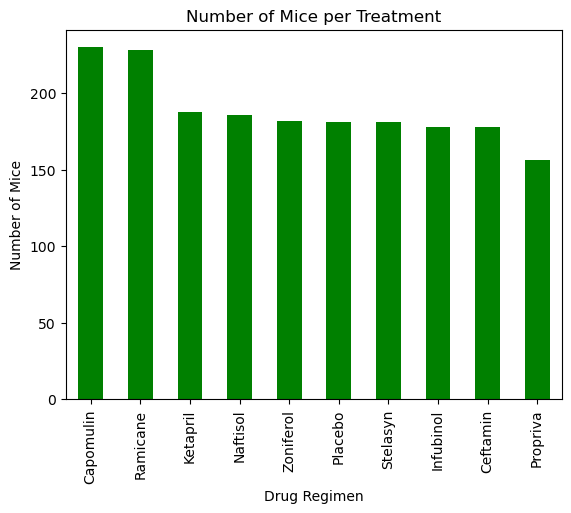

In [324]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = {
    'Mouse ID': ['Mouse1', 'Mouse2', 'Mouse3', 'Mouse4', 'Mouse1', 'Mouse2'],
    'Drug Regimen': ['Drug A', 'Drug A', 'Drug B', 'Drug B', 'Drug A', 'Drug B'],
    'Timepoint': [0, 0, 0, 0, 1, 1]
}

# Group by 'Drug Regimen' and count the number of rows
counts = df.groupby('Drug Regimen').size()
# Create a Pandas bar plot based off of the group series from before and label the title
plot_pandas = mice_count.plot.bar(color='g')  

# Create a bar plot

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


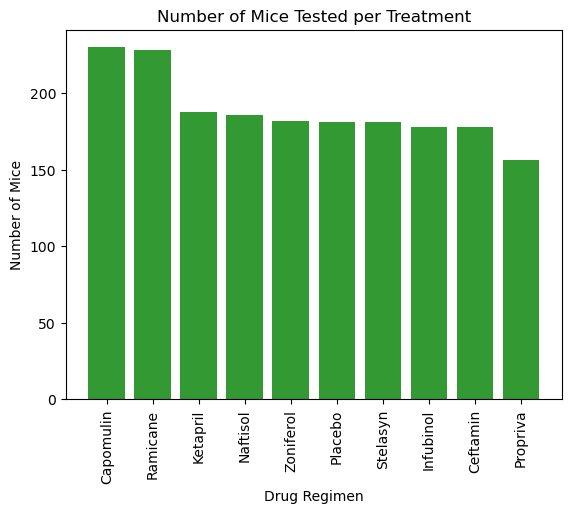

In [342]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

drug_counts = df.groupby('Drug Regimen')['Mouse ID'].count()

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='g', alpha=0.8, align='center')

# Create a bar plot

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

In [ ]:
# Print the column names to identify the correct name for gender
print("Columns in data:", data.columns)

Columns in data: Index(['Mouse ID', 'Drug Regimen', 'Timepoint'], dtype='object')


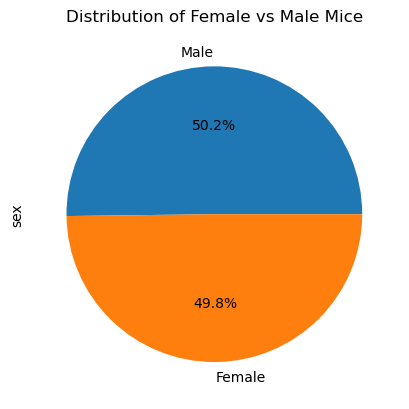

In [337]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'data' is a DataFrame
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Remove duplicate Mouse IDs to get unique entries
unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')

# Count unique mice by gender
gender_data = unique_mice['Sex'].value_counts()

# Plot the pie chart
labels = gender_data.index
sizes = gender_data.values
gender_data.plot.pie(y='Total Count', autopct="%1.1f%%", labels=labels)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('sex')  # Hides the y-axis label for a cleaner look
plt.show()


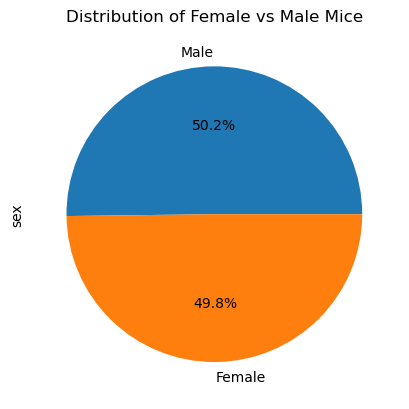

In [375]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'data' is a DataFrame
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Remove duplicate Mouse IDs to get unique entries
unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')

# Count unique mice by gender
gender_data = unique_mice['Sex'].value_counts()

# Prepare the data for the pie chart
labels = gender_data.index
sizes = gender_data.values

# Generate the pie chart using pyplot
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=360)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('sex')  # Hides the y-axis label for a cleaner look
plt.show()



## Quartiles, Outliers and Boxplots

In [242]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

In [244]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [245]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [247]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [248]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [249]:
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [251]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [252]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


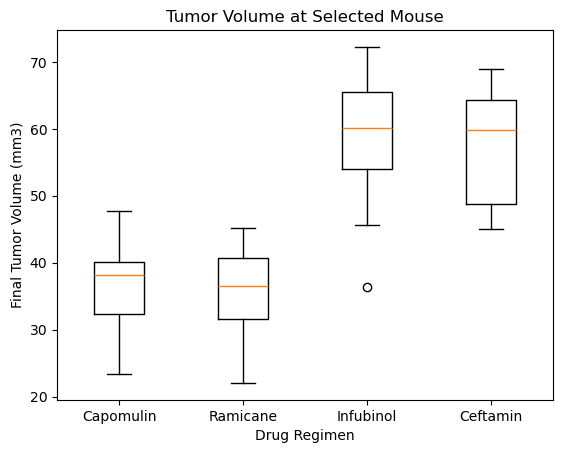

In [253]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

In [254]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [255]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [257]:
# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

    

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

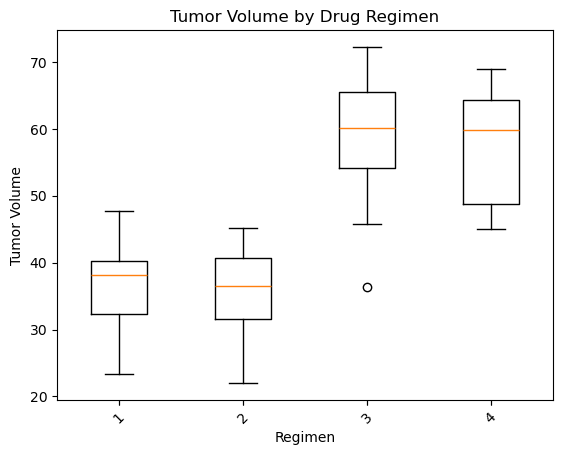

In [259]:
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

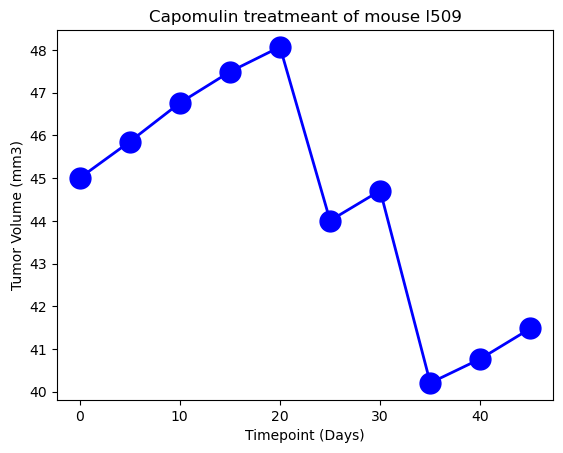

In [261]:
#Filter data for mice treated with Capomulin
# Choose a single mouse ID for plotting (replace 's185' with an actual ID from your dataset)

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')



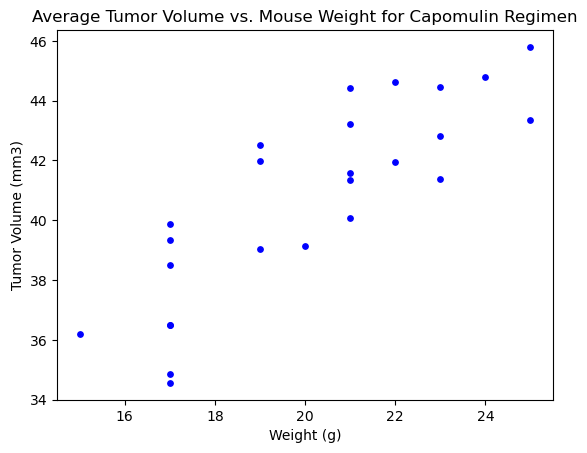

In [266]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Ensure we only include numeric columns when calculating the mean
avg_capm_vol = Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)


fig1, ax1 = plt.subplots()
marker_size = 15

plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], color="blue", s=marker_size)
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


Index(['Mouse ID', 'Drug Regimen', 'Timepoint'], dtype='object')


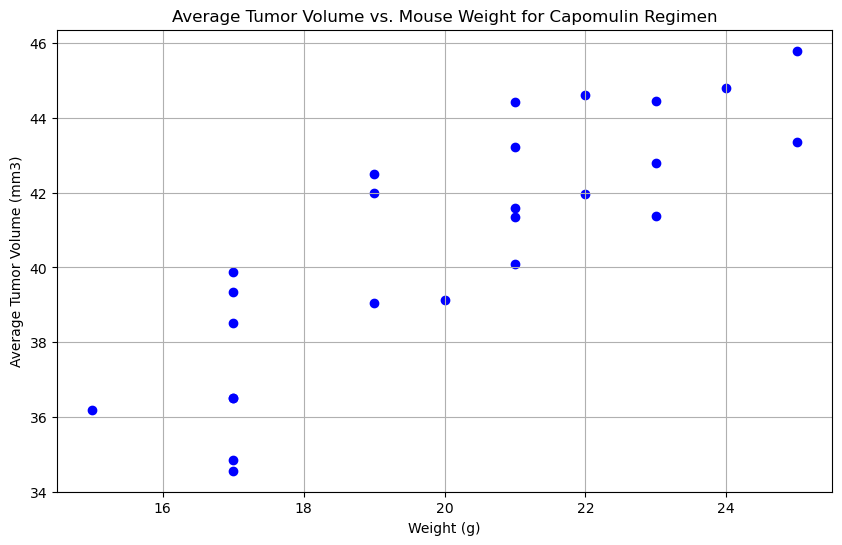

In [323]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the mouse study data
# Step 1: Filter for Capomulin regimen
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Step 3: Check the column names in the original DataFrame
print(data.columns)  # This will help you identify the correct weight column name

# Step 4: Ensure you use the exact column name for mouse weight
# Assuming the column name for mouse weight is 'Weight (g)', replace with the correct name if different
mouse_weight_data = combined_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Step 5: Merge average tumor volume with mouse weight data
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on='Mouse ID')

# Step 6: Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', marker='o')

# Add axis labels and a title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.grid()  # Optional: Add grid for better readability

# Show the plot
plt.show()

## Correlation and Regression

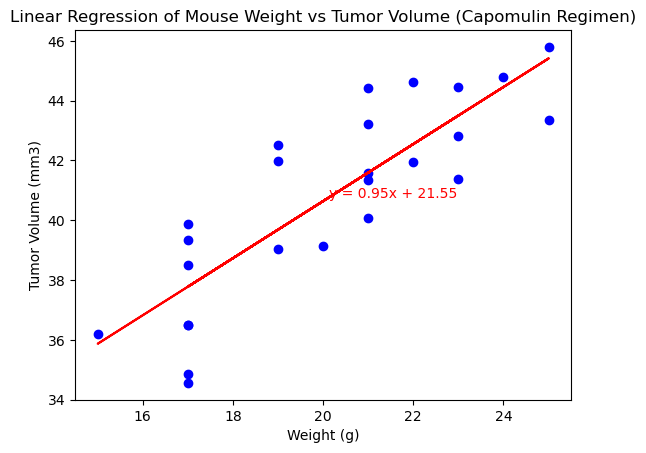

In [268]:
from scipy.stats import linregress  # Import linregress for linear regression

# Calculate the correlation coefficient and linear regression model
# for mouse weight and average observed tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_capm_vol["Weight (g)"], avg_capm_vol["Tumor Volume (mm3)"])

# Calculate regression line values
regress_values = avg_capm_vol["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Optional: Plot the regression line
plt.scatter(avg_capm_vol["Weight (g)"], avg_capm_vol["Tumor Volume (mm3)"], color="blue")
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear Regression of Mouse Weight vs Tumor Volume (Capomulin Regimen)")
plt.annotate(line_eq, (avg_capm_vol["Weight (g)"].mean(), regress_values.mean()), color="red")
plt.show()
